### Libraries that i need to use

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



### Dataset

In [2]:
df = pd.read_csv("Loans_Dataset.csv")
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


### Data set Info

In [3]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Basic stats
df.describe()

Shape: (1004, 6)

Data Types:
 initial_payment     int64
last_payment        int64
credit_score        int64
house_number        int64
sum                 int64
result             object
dtype: object

Missing Values:
 initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64


,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,4041.282869,17744.012948
std,115.844218,1442.134231,259.681745,618.431417,9594.659715
min,100.000000,10005.000000,100.000000,3003.000000,13515.000000
25%,195.750000,11213.500000,302.750000,3546.500000,16081.250000
50%,290.000000,12467.000000,518.000000,4046.000000,17383.000000
75%,398.000000,13690.000000,755.000000,4508.750000,18608.250000
max,500.000000,14999.000000,997.000000,9876.000000,246789.000000


### The Result of the info 

In [6]:
# Check class balance
df['result'].value_counts()


result
No     521
yes    483
Name: count, dtype: int64

### Part of Data Test

In [7]:
df = df.fillna(df.mean(numeric_only=True))

# Encode the target column
df['result'] = df['result'].astype('category').cat.codes


### Data Test

In [8]:
X = df.drop('result', axis=1)
y = df['result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Model Decision

In [9]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

### Accuracy Evaluation

In [10]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9950248756218906

Confusion Matrix:
 [[106   1]
 [  0  94]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      0.99        94

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



### Graph

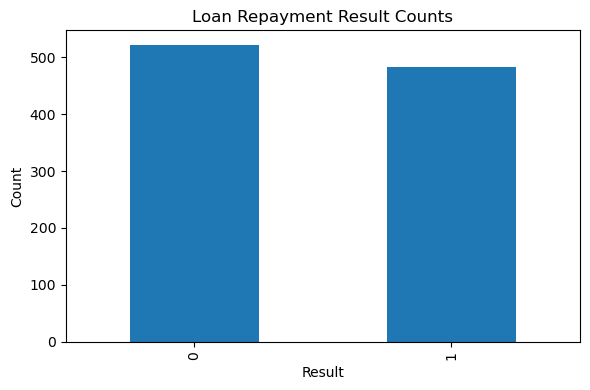

In [16]:
import matplotlib.pyplot as plt  # lets us make graphs

plt.figure(figsize=(6,4))  # size of graph window

# count how many 0s and 1s we have in the result column
df['result'].value_counts().plot(kind='bar')  

plt.title("Loan Repayment Result Counts")  # title on top
plt.xlabel("Result")  # label for x-axis
plt.ylabel("Count")   # label for y-axis

plt.tight_layout()  # make sure labels fit
plt.show()          # display the graph


### Heat Map

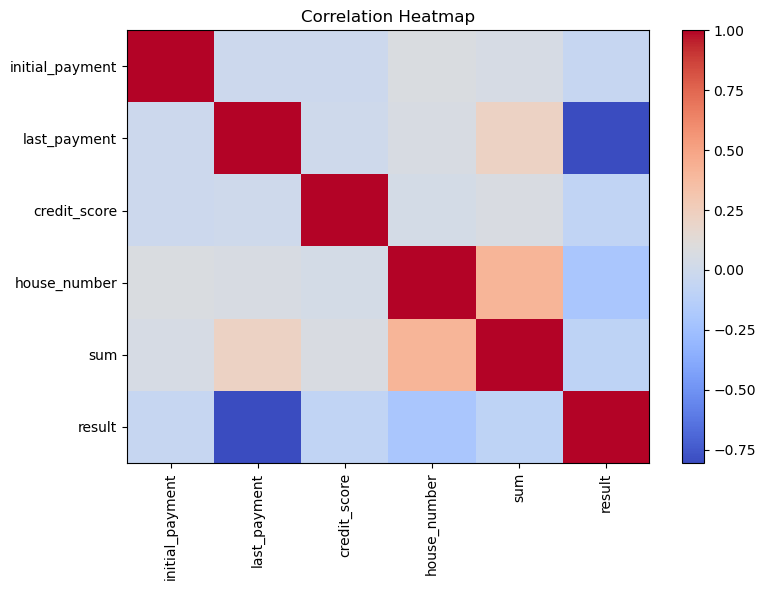

In [14]:
import numpy as np
# make a table showing how numbers relate
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()  # show scale
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90) # X 
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()  # fix layout
plt.show()


### Reflection